# Métricas de Avaliação 

- Sensibilidade: Mede a capacidade do modelo em identificar corretamente as instâncias positivas. É calculada como a razão entre o número de verdadeiros positivos e a soma dos verdadeiros positivos e falsos negativos.
- Especificidade: Mede a capacidade do modelo em identificar corretamente as instâncias negativas. É calculada como a razão entre o número de verdadeiros negativos e a soma dos verdadeiros negativos e falsos positivos.
- Acurácia: Mede a capacidade do modelo em classificar corretamente todas as instâncias. É calculada como a razão entre o número total de acertos (verdadeiros positivos e verdadeiros negativos) e o número total de instâncias.
- Precisão: Mede a proporção de instâncias classificadas como positivas que são realmente positivas. É calculada como a razão entre o número de verdadeiros positivos e a soma dos verdadeiros positivos e falsos positivos.
- F1 Score: É a média harmônica entre precisão e sensibilidade, oferecendo uma medida balanceada entre as duas métricas. É especialmente útil quando há um desbalanceamento entre as classes. 

## codigo para obter matrix de confusão

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tf.__version__

'2.19.0'

In [6]:
%load_ext tensorboard
logdir = 'log'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

classes = [str(i) for i in range(10)]

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

c:\Users\lexan\OneDrive\Documents\machine_learning\projeto_dio_calculo_metricas_avaliacao\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1299 - loss: 2.7740 - val_accuracy: 0.1298 - val_loss: 2.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1313 - loss: 2.3026 - val_accuracy: 0.1298 - val_loss: 2.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1302 - loss: 2.3026 - val_accuracy: 0.1298 - val_loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1305 - loss: 2.3026 - val_accuracy: 0.1298 - val_loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1282 - loss: 2.3026 - val_accuracy: 0.1298 - val_loss: 2.3026


In [12]:
y_true = test_labels
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


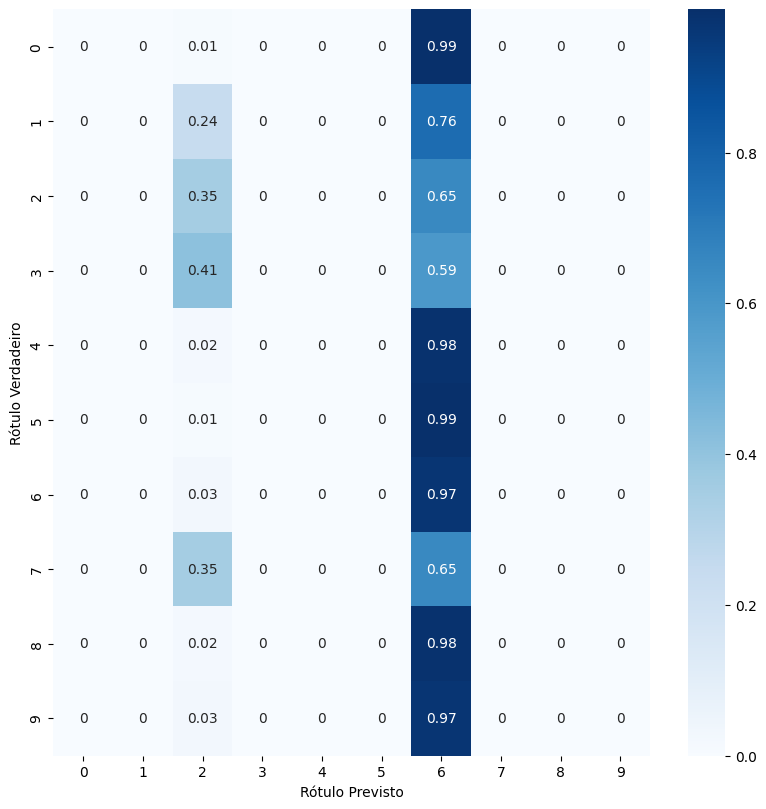

In [15]:
# Calcula a matriz de confusão
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()

# Normaliza a matriz de confusão para que as linhas somem 1
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# Cria um DataFrame do Pandas para facilitar a plotagem
con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

# Cria a figura e o gráfico de calor (heatmap)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)

# Ajusta o layout e adiciona rótulos aos eixos
plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')

# Exibe o gráfico
plt.show()

### Sensibilidade

In [18]:
sensibility = np.diag(con_mat) / np.sum(con_mat, axis=1)
print("Sensibilidade (Recall):", sensibility)

Sensibilidade (Recall): [0.         0.         0.35271318 0.         0.         0.
 0.97494781 0.         0.         0.        ]


### Especificidade

In [20]:
specificity = np.diag(con_mat) / np.sum(con_mat, axis=0)
print("Especificidade:", specificity)

Especificidade: [       nan        nan 0.23759791        nan        nan        nan
 0.11031062        nan 0.                nan]


C:\Users\lexan\AppData\Local\Temp\ipykernel_34068\2411576978.py:1: RuntimeWarning: invalid value encountered in divide
  specificity = np.diag(con_mat) / np.sum(con_mat, axis=0)


### accuracy

In [17]:
accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.1298


### precisão

In [21]:
precisao = np.diag(con_mat) / np.sum(con_mat, axis=0)
print("Precisão:", precisao)

Precisão: [       nan        nan 0.23759791        nan        nan        nan
 0.11031062        nan 0.                nan]


C:\Users\lexan\AppData\Local\Temp\ipykernel_34068\3591844660.py:1: RuntimeWarning: invalid value encountered in divide
  precisao = np.diag(con_mat) / np.sum(con_mat, axis=0)


### f1_score

In [22]:
f1_score = 2 * (precisao * sensibility) / (precisao + sensibility)
print("F1 Score:", f1_score)

F1 Score: [       nan        nan 0.28393136        nan        nan        nan
 0.19819629        nan        nan        nan]


C:\Users\lexan\AppData\Local\Temp\ipykernel_34068\1248730088.py:1: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * (precisao * sensibility) / (precisao + sensibility)
